In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# **Getting started**

First we need to know about the data set

1. Get the data set using pd.read_csv()
2. Printing the head() -> head prints the first 5 rows

In [2]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Analyzing Data**

In [3]:
def printInfo():
    print("Train Data: ")
    print(train_df.info())
    print("---------------")
    print("Test Data: ")
    print(test_df.info())

printInfo()

Train Data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
---------------
Test Data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pass

In [4]:
def printNa():
    print("Train Data")
    print(train_df.isna().sum())
    print("---------------")
    print("Test Data")
    print(test_df.isna().sum())


printNa()

Train Data
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
---------------
Test Data
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Visualizing the Missing Data

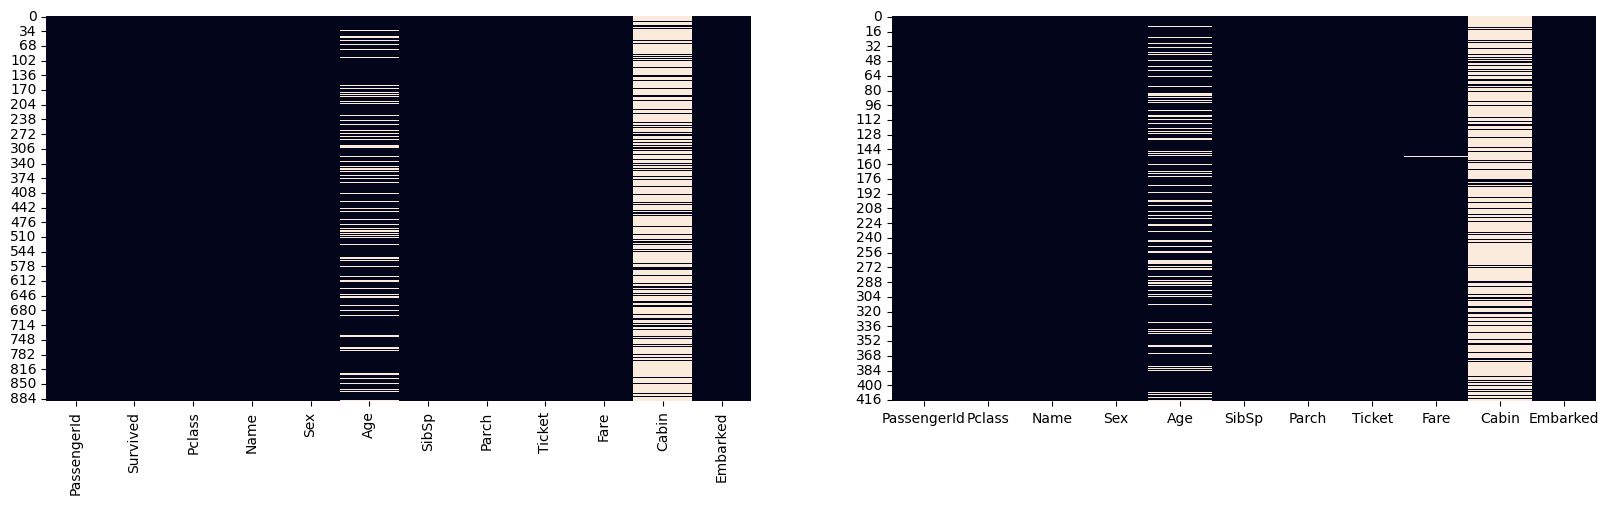

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 2, figsize=(20, 5))

sns.heatmap(train_df.isna(), ax=ax[0], cbar=False)
sns.heatmap(test_df.isna(), ax=ax[1], cbar=False)

plt.show()

## **Data Cleaning**

## **Removing missing values**

##### Removing the embarked index from the test_df as it won't has much effect on the test_df

#### Removing indexing of 2 missing value in embarked

In [6]:
train_df.dropna(subset=["Embarked"], axis=0, how="all", inplace=True)
printNa()

Train Data
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
---------------
Test Data
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


## **Adding Missing Values**

Age can be add based on:abs

1. Median
2. Mean
3. Pclass function -> used Here

<Axes: xlabel='Pclass', ylabel='Age'>

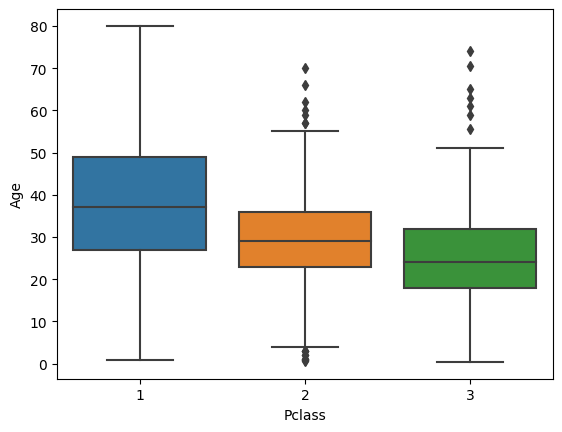

In [7]:
sns.boxplot(x=train_df['Pclass'], y=train_df['Age'])

In [8]:
pd.DataFrame(train_df.groupby('Pclass')['Age'].mean())

,Age
Pclass,
1,38.105543
2,29.877630
3,25.140620


In [9]:
def input_na_age(age, pclass):
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 30
        else:
            return 25
    else:
        return age

train_df['Age'] = train_df.apply(lambda x: input_na_age(x['Age'], x['Pclass']), axis=1)
test_df['Age'] = test_df.apply(lambda x: input_na_age(x['Age'], x['Pclass']), axis=1)

printNa()

Train Data
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
---------------
Test Data
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


There is a missing value in the test_df **Fare**

In [10]:
test_df['Fare'] = test_df['Fare'].fillna(train_df['Fare'].mean())
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,25.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,25.0,0,0,359309,8.0500,NaN,S


#### **Converting the non-numerical to numerical**

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [12]:
train_df['Sex'] = le.fit_transform(train_df['Sex'])

test_df['Sex'] = le.fit_transform(test_df['Sex'])

train_df['Embarked'] = le.fit_transform(train_df['Embarked'])

test_df['Embarked'] = le.fit_transform(test_df['Embarked'])

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


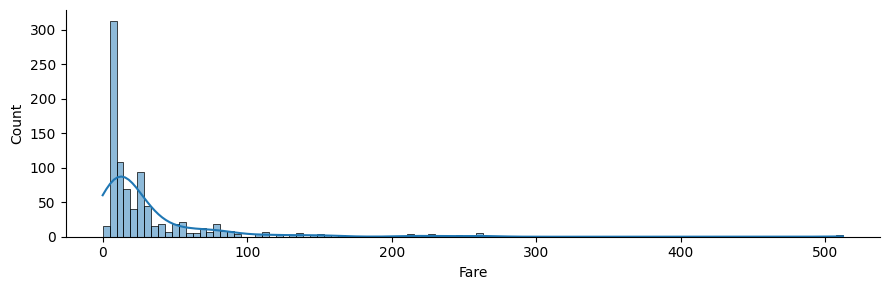

In [13]:
sns.displot(train_df['Fare'], kde=True, height=3, aspect=3/1)

## **Feature Scaling**

In [14]:
train_df["Fare"] = train_df["Fare"].apply(lambda x: np.log(x) if x > 0 else 0)
train_df["Age"] = train_df["Age"].apply(lambda x: np.log(x) if x > 0 else 0)
test_df["Fare"] = test_df["Fare"].apply(lambda x: np.log(x) if x > 0 else 0)
test_df["Age"] = test_df["Age"].apply(lambda x: np.log(x) if x > 0 else 0)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


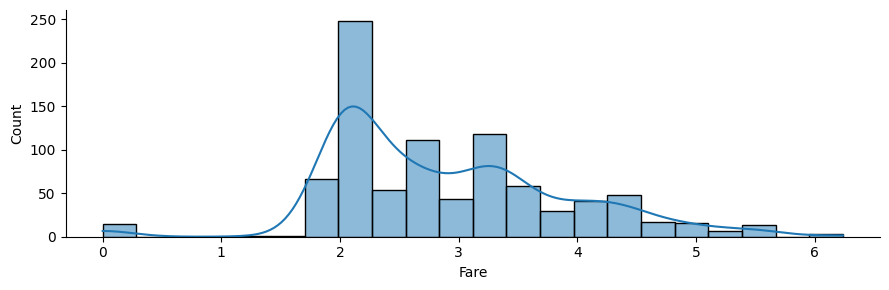

In [15]:
sns.displot(train_df['Fare'], kde=True, height=3, aspect=3/1)

# **Fitting Models**

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV



dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier(n_jobs=-1)

In [17]:
from sklearn.model_selection import train_test_split

X = train_df[['Pclass', "Sex", "SibSp", "Parch", "Fare", "Age", "Embarked"]]
y = train_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True) 

In [18]:
model = dtc.fit(X_train, y_train)
model.score(X_train, y_train)

0.9834834834834835

In [19]:
pred = model.predict(X_test)
print(classification_report(y_test, pred))
print(accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       140
           1       0.80      0.80      0.80        83

    accuracy                           0.85       223
   macro avg       0.84      0.84      0.84       223
weighted avg       0.85      0.85      0.85       223

0.8475336322869955


In [20]:
param_grid = {
    "criterion": ["entropy", "gini"],
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [2, 4, 6, 8, 10]
}

grid_search = GridSearchCV(dtc, param_grid, scoring="accuracy", cv=5)
grid_search.fit(X_train, y_train)


print(grid_search.best_params_)

{'criterion': 'entropy', 'max_features': 'log2', 'min_samples_split': 10}


In [21]:
model_dtc = grid_search.best_estimator_

In [22]:
y_pred = model_dtc.predict(X_test)

In [23]:
accuracy = model_dtc.score(X_test, y_test)
accuracy

0.8295964125560538

In [24]:
param_grid = {
    "criterion": ["entropy", "gini"],
    "max_features": ["sqrt", "log2"],
    "n_estimators": [50, 100, 150, 200],
    "max_depth": [None, 10, 20, 30]
}


grid_search = GridSearchCV(rfc, param_grid, scoring="accuracy", cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 100}


In [25]:
model_rfc = grid_search.best_estimator_

y_pred = model_rfc.predict(X_test)

accuracy = model_rfc.score(X_test, y_test)

accuracy

0.8475336322869955

In [26]:
predictions = model_rfc.predict(test_df[['Pclass', "Sex", "SibSp", "Parch", "Fare", "Age", "Embarked"]])

In [27]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
